In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DF = pd.read_excel("PQM Dataset.xlsx", sheet_name = "Active Power_1day")

In [3]:
print("Data Shape:", DF.shape)
print("\nFirst few rows:\n", DF.head())
print("\n")
print("\nBasic info:\n", DF.info())
print("\nDescriptive statistics:\n", DF.describe())
print("\nNumber of missing values in each column:\n", DF.isnull().sum())

Data Shape: (251, 13)

First few rows:
    TimeID     Col_1      Col_2     Col_3     Col_4     Col_5     Col_6  \
0       1 -326.8639  -61.68556 -272.0387  -998.806  4549.690  2771.657   
1       2 -326.8639 -188.89300 -253.0680  3677.328  6849.814  4678.484   
2       3 -308.7295 -188.89300 -227.8843  3651.681  6980.653  4660.138   
3       4 -290.5506 -188.89300 -210.1088  3677.417  4200.829  3900.563   
4       5 -457.8011    0.00000 -217.6656  3586.336  4476.815  3977.022   

      Col_7      Col_8      Col_9     Col_10    Col_11    Col_12  
0 -1729.609   283.3394  -938.5463  -889.8751  6104.429  3982.242  
1 -2550.632 -1162.5750 -1676.1820  5595.8300  9393.350  6607.734  
2 -2747.055 -1438.9160 -1867.9390  5595.8300  9393.350  6755.961  
3 -1678.687 -1438.9160 -1590.7840  5559.5430  5977.435  5701.456  
4 -1729.609 -1318.8850 -1564.9640  5559.5430  6104.429  5759.652  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 13 columns):
 #   C

In [4]:
cleanDF = DF.fillna(DF.mean())
#cleanDF = DF.fillna(0)

In [5]:
def find_mean(data):
    mean = np.mean(data)
    return mean

def find_median(data):
    median = np.median(data)
    return median

def find_std_dev(data):
    std_dev = np.std(data)
    return std_dev

Statistics for each column:


Column: Col_1
Mean: 126.0000
Median: 126.0000
Standard Deviation: 72.4569


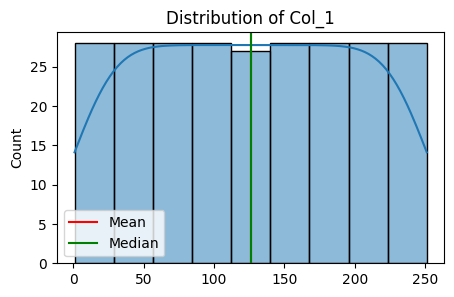


Column: Col_2
Mean: 3862026.4973
Median: -2368.6130
Standard Deviation: 8366222.2652


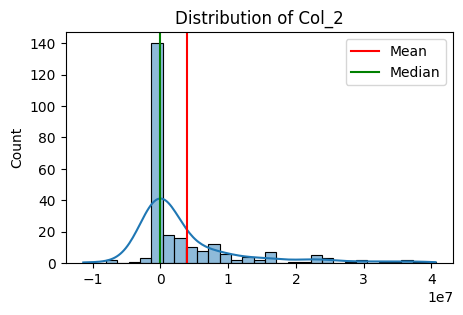


Column: Col_3
Mean: 32695067.9674
Median: 40013100.0000
Standard Deviation: 16439443.4980


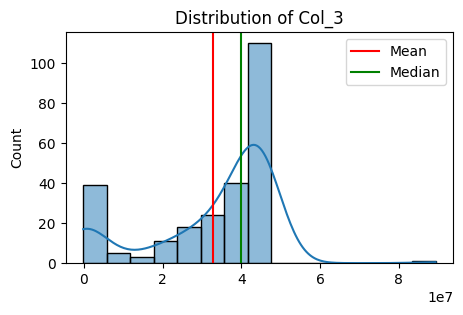


Column: Col_4
Mean: 17478731.5290
Median: 15385170.0000
Standard Deviation: 13305287.1671


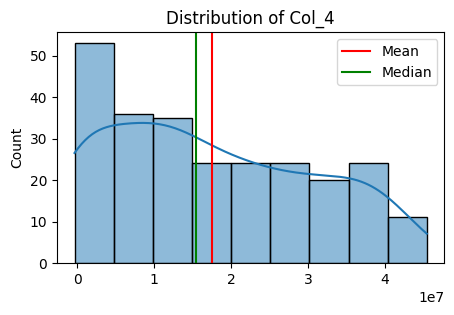


Column: Col_5
Mean: 11420318.2641
Median: -134702.3000
Standard Deviation: 25841794.5352


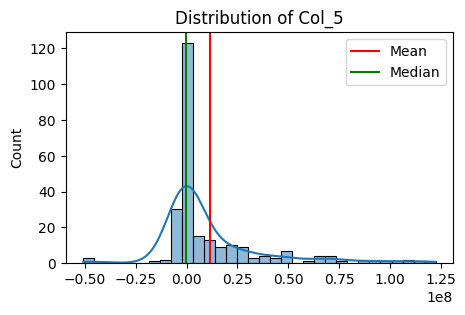


Column: Col_6
Mean: 97500513.4003
Median: 120571900.0000
Standard Deviation: 48491356.4243


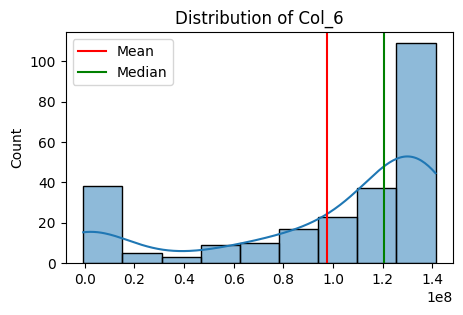


Column: Col_7
Mean: 52696074.3832
Median: 46289180.0000
Standard Deviation: 40120179.9547


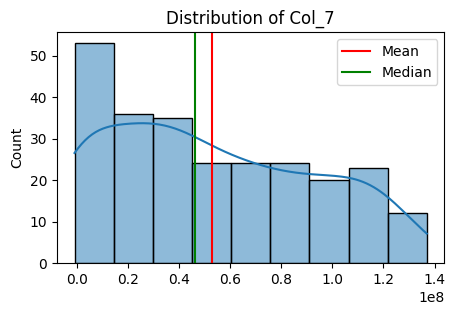


Column: Col_8
Mean: 3381750.9345
Median: -60336.6100
Standard Deviation: 9998174.3193


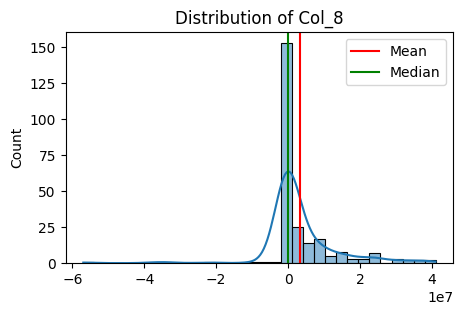


Column: Col_9
Mean: 32745692.7025
Median: 40354620.0000
Standard Deviation: 16221387.3739


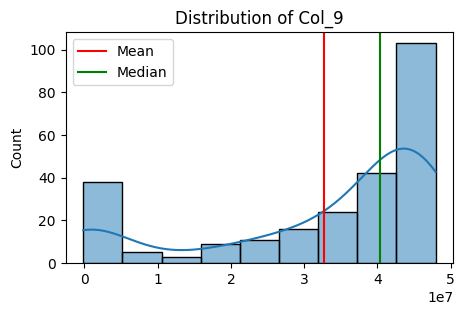


Column: Col_10
Mean: 17656399.5226
Median: 15452540.0000
Standard Deviation: 13419345.6766


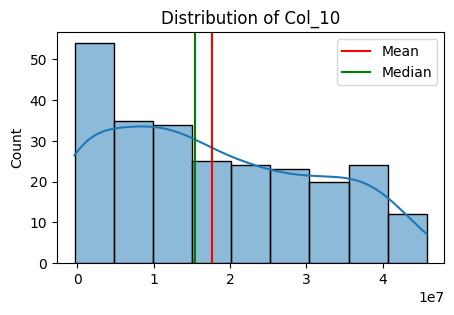


Column: Col_11
Mean: 3573723.8415
Median: -62829.4300
Standard Deviation: 9087295.6277


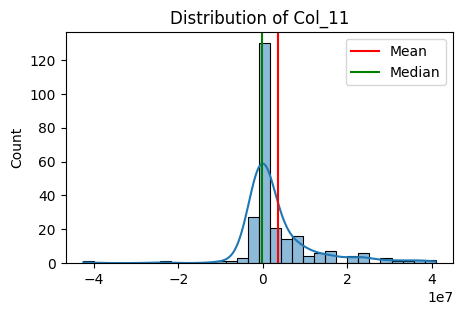


Column: Col_12
Mean: 32558186.9563
Median: 40211290.0000
Standard Deviation: 16192028.0468


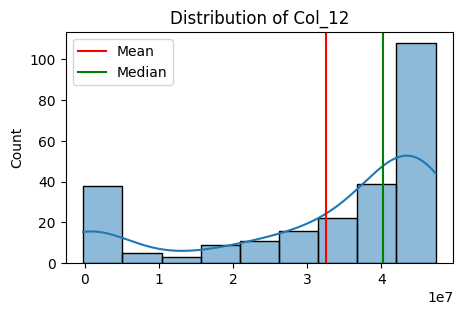

In [6]:
# calculating statistics for each column
print("Statistics for each column:\n")

cols = [col for col in cleanDF.columns if col != 'TimeID']

for i, column in enumerate(cols):
    data = cleanDF.iloc[:, i].values
    
    print(f"\nColumn: {column}")
    print(f"Mean: {find_mean(data):.4f}")
    print(f"Median: {find_median(data):.4f}")
    print(f"Standard Deviation: {find_std_dev(data):.4f}")

    plt.figure(figsize=(5, 3))
    sns.histplot(data, kde=True)
    plt.axvline(find_mean(data), color='red', label='Mean')
    plt.axvline(find_median(data), color='green', label='Median')
    plt.legend()
    plt.title(f"Distribution of {column}")
    plt.show()
    


Outliers for each column (Z-score > 3):


Column: Col_1
Number of outliers: 8


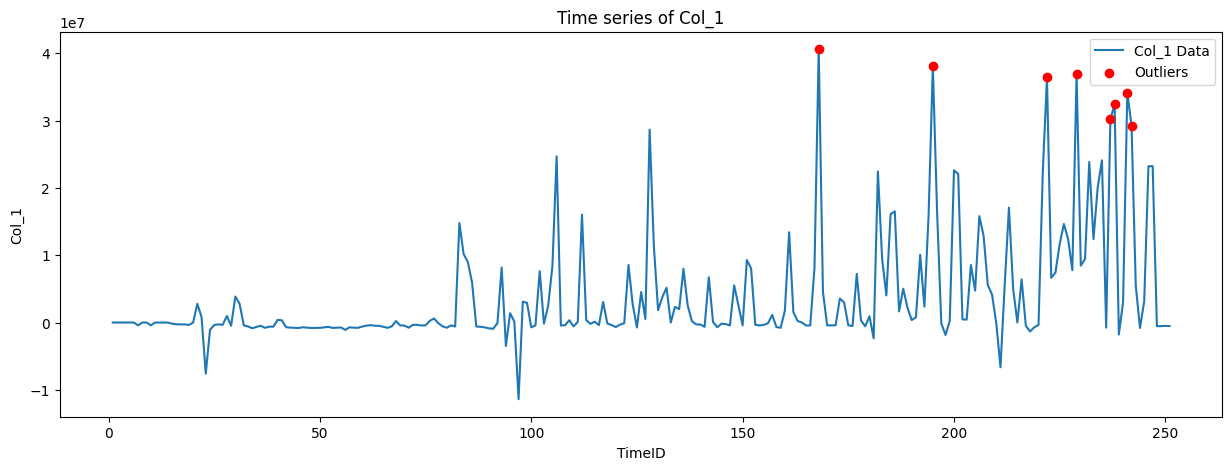


Column: Col_2
Number of outliers: 1


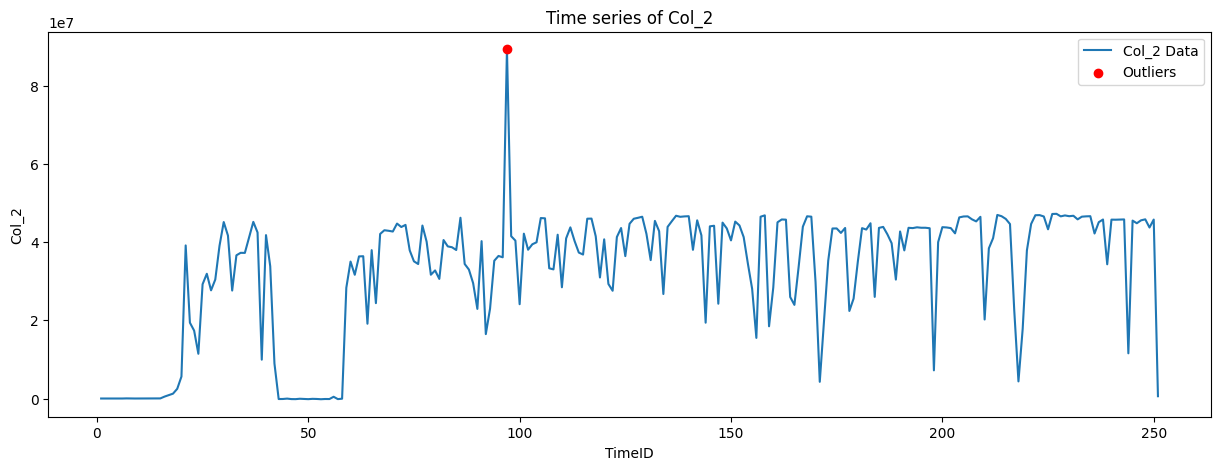


Column: Col_3
Number of outliers: 0


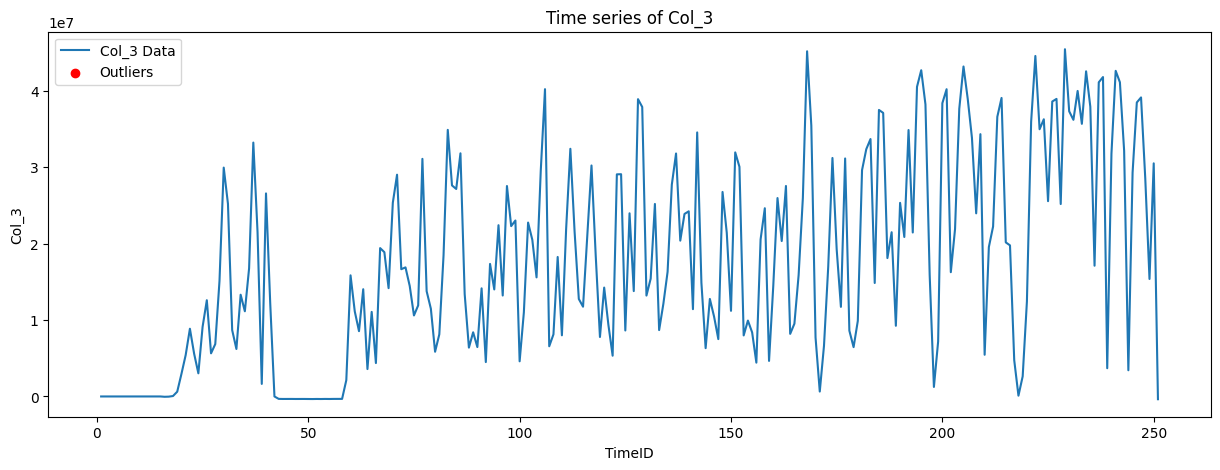


Column: Col_4
Number of outliers: 7


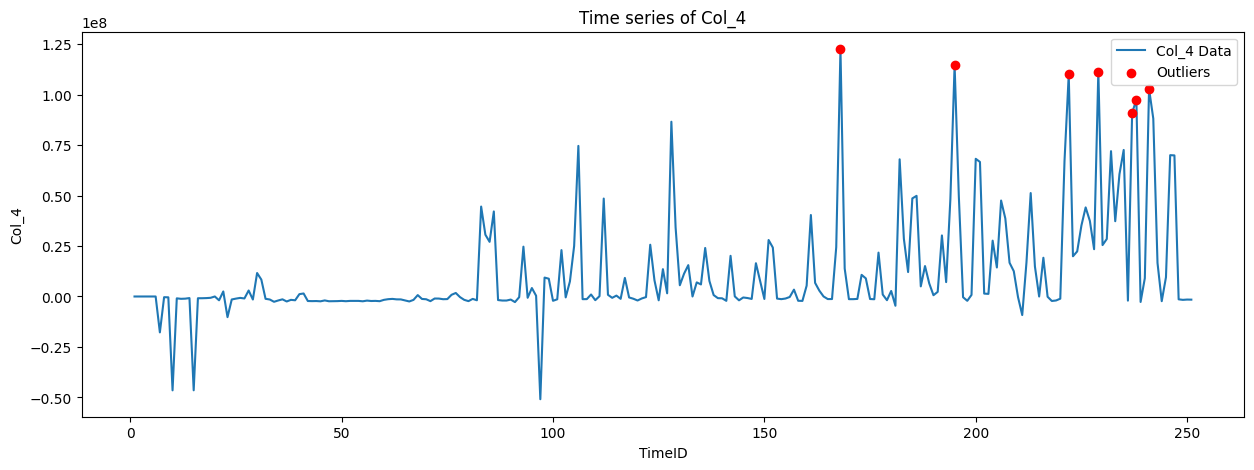


Column: Col_5
Number of outliers: 0


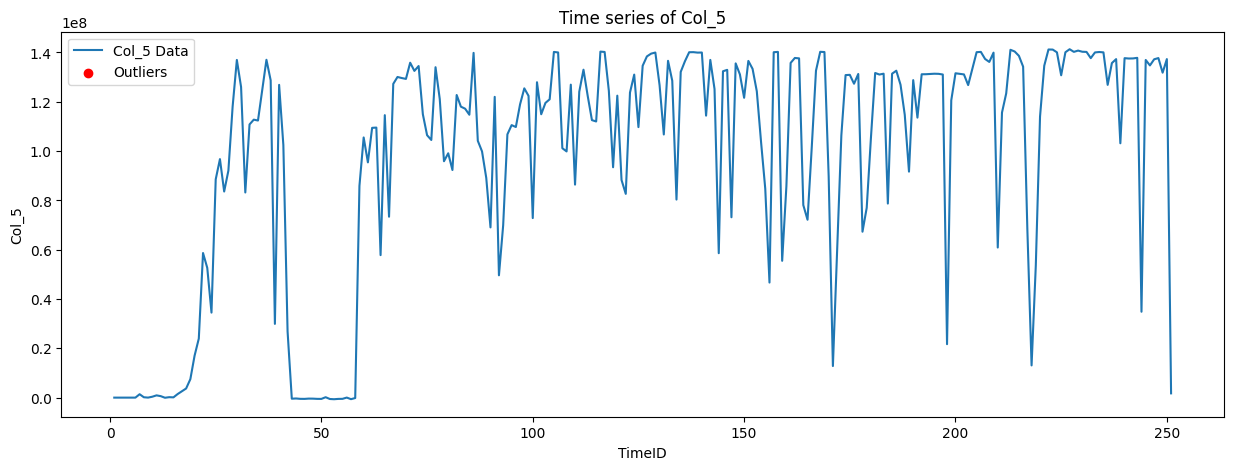


Column: Col_6
Number of outliers: 0


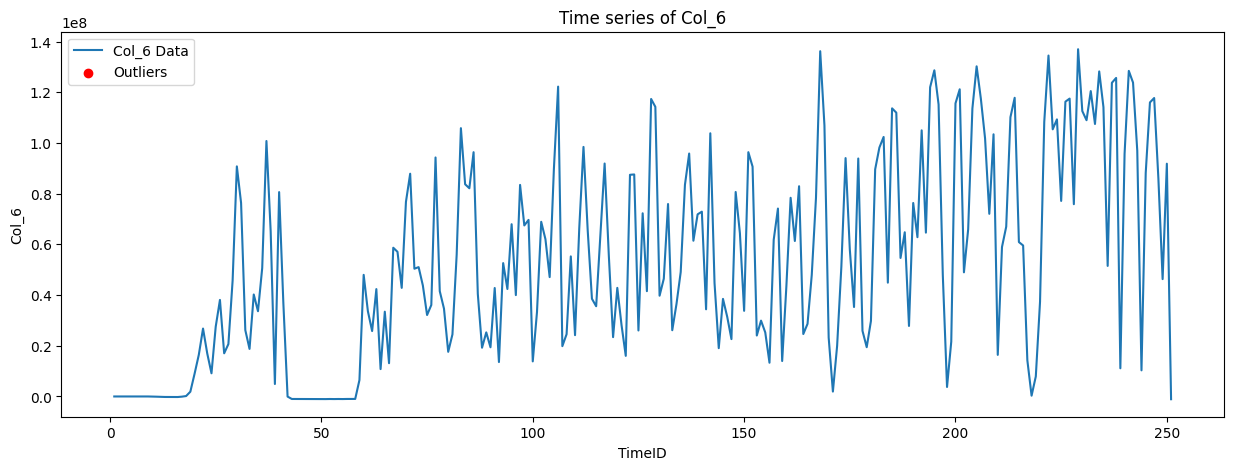


Column: Col_7
Number of outliers: 8


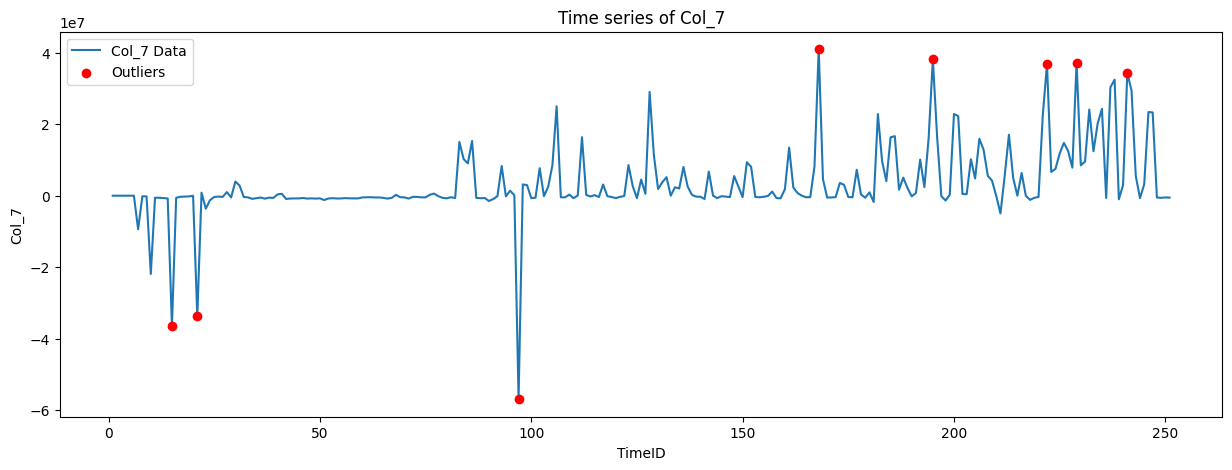


Column: Col_8
Number of outliers: 0


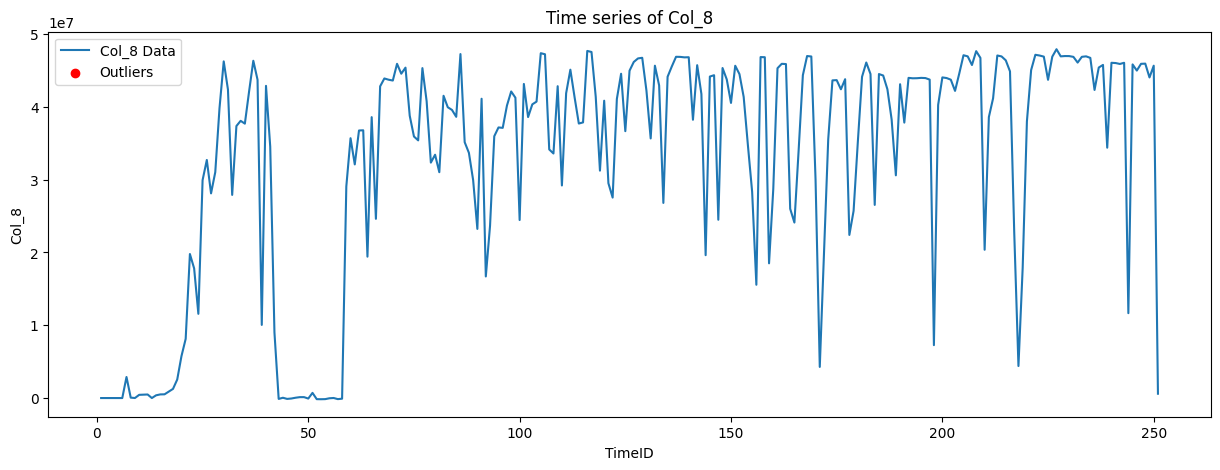


Column: Col_9
Number of outliers: 0


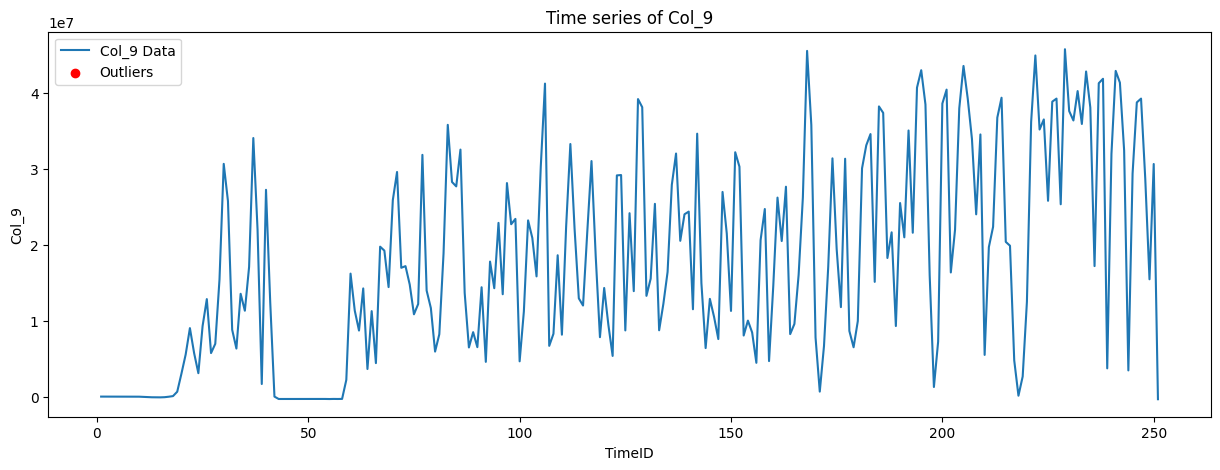


Column: Col_10
Number of outliers: 8


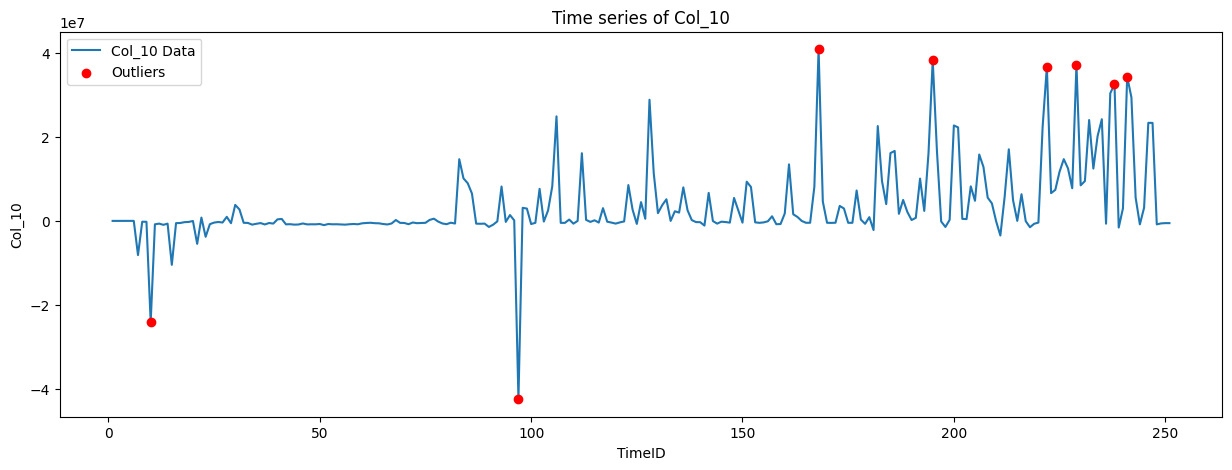


Column: Col_11
Number of outliers: 0


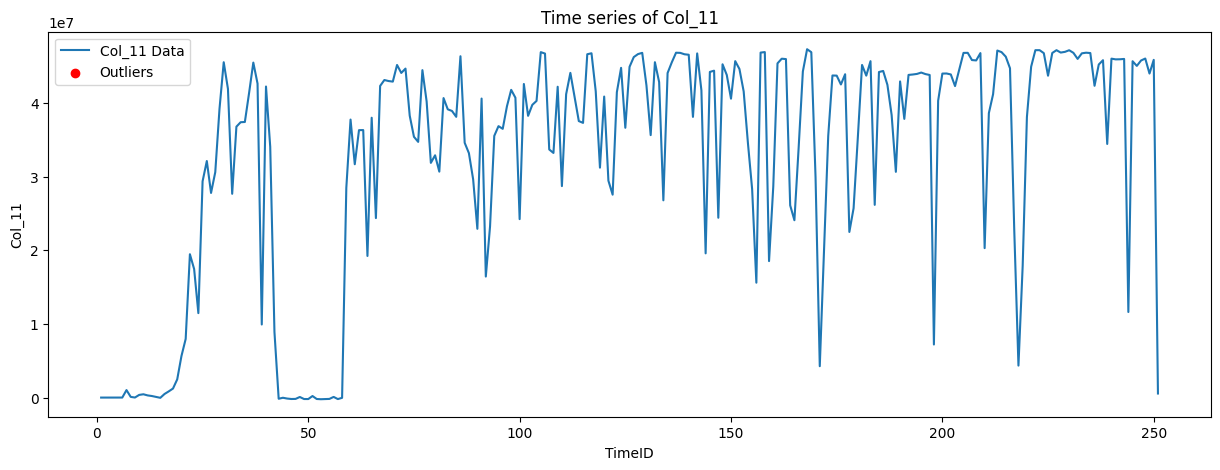


Column: Col_12
Number of outliers: 0


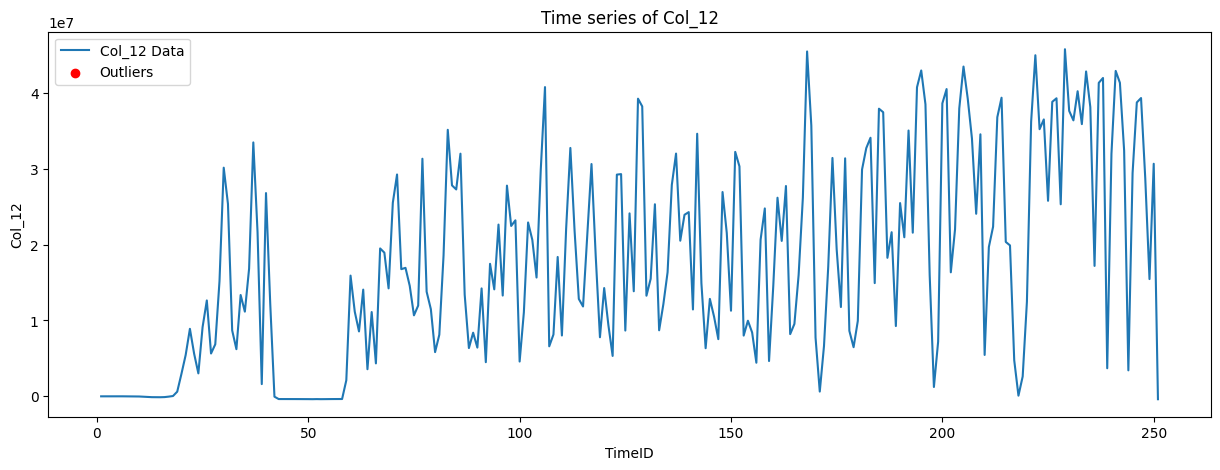

In [7]:
# calculating outliers using Z-scoring
print("\nOutliers for each column (Z-score > 3):\n")

columns = [col for col in cleanDF.columns if col != 'TimeID']
time_data = cleanDF['TimeID'].values

for column in columns:
    feature_data = cleanDF[column].values
    
    mean = find_mean(feature_data)
    std_dev = find_std_dev(feature_data)
    
    z_scores = (feature_data - mean) / std_dev
    outliers = np.abs(z_scores) > 3
    
    print(f"\nColumn: {column}")
    print(f"Number of outliers: {np.sum(outliers)}")
    
    plt.figure(figsize=(15, 5))
    plt.plot(time_data, feature_data, label = f'{column} Data')
    plt.scatter(time_data[outliers], feature_data[outliers], color='red', label= 'Outliers', zorder = 5)
    plt.title(f"Time series of {column}")
    plt.xlabel("TimeID")
    plt.ylabel(column)
    plt.legend()
    plt.show()